# **Jewellery Sales Forecasting Dashboard Using AI Technology**

Here's a breakdown of the different sections and their functionalities:

1. Data Upload:
   - This section lists the files available in the input directory.

2. Data Cleaning:
   - This section performs various cleaning tasks on the loaded dataset:
     - Checks for missing values in the columns.
     - Handles missing values in the 'Gender' column by replacing them with 'f'.
     - Drops the 'Quantity' column as it contains only one unique value.
     - Removes rows with missing values in 'USDPrice' and 'UserID'.
     - Fills missing values in 'CategoryCode' with 'other'.
     - Fills missing values in 'BrandID' with '-1'.
     - Fills missing values in 'Gem', 'Color', and 'Metal' columns with 'unknown'.

3. Exploratory Data Analysis (EDA):
   - This section explores different aspects of the cleaned dataset using visualizations.
   - It includes analyzing the distribution of colors, metal types per brand, gem popularity, category code distribution, and brand popularity.

4. Total Sales Forecasting:
   - This section focuses on forecasting total sales.
   - It preprocesses the data by converting it into a time-series problem, splitting it into train, validation, and test sets.
   - It builds an LSTM model for predicting sales.
   - Trains the model, plots the training history, and evaluates its performance on the validation and test sets.
   - Finally, it provides visualizations of the predicted sales compared to the actual sales for the validation and test periods.

Overall, the code demonstrates the process of loading, cleaning, exploring, and forecasting sales for an e-commerce jewelry dataset using Python and various libraries such as pandas, seaborn, matplotlib, and TensorFlow/Keras.

# **1. Data Upload**

Data Upload:
   - The code imports the necessary libraries, such as NumPy and Pandas, for data processing and analysis.
   - It prints the list of files available in the input directory.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
import os
for dirname, _, filenames in os.walk('/content/jewelry.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset From: https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-jewelry-store

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df_cols = ['Datetime','OrderID','ProductID','Quantity','CategoryID','CategoryCode','BrandID','USDPrice','UserID','Gender','Color','Metal','Gem']
df = pd.read_csv('/content/jewelry.csv',names=df_cols )
df.head(2)

,Datetime,OrderID,ProductID,Quantity,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN


# **2. Data Cleaning**

Data Cleaning:
   - The code reads a CSV file ('jewelry.csv') into a Pandas DataFrame, specifying column names.
   - It performs some data cleaning steps:
     - Checks for missing values in the DataFrame.
     - Handles missing values in the 'Gender' column by replacing them with 'f'.
     - Drops the 'Quantity' column since it has only one unique value.
     - Handles missing values in the 'USDPrice' and 'UserID' columns by deleting rows with missing values.
     - Fills missing values in the 'CategoryCode' column with 'other'.
     - Fills missing values in the 'BrandID', 'Color', 'Metal', and 'Gem' columns with 'unknown'.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   Quantity      95911 non-null  int64  
 4   CategoryID    90559 non-null  float64
 5   CategoryCode  85978 non-null  object 
 6   BrandID       91126 non-null  float64
 7   USDPrice      90559 non-null  float64
 8   UserID        90559 non-null  float64
 9   Gender        47743 non-null  object 
 10  Color         88251 non-null  object 
 11  Metal         90449 non-null  object 
 12  Gem           61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


Check missing values per column

In [9]:
df.isna().sum()

Datetime            0
OrderID             0
ProductID           0
Quantity            0
CategoryID       5352
CategoryCode     9933
BrandID          4785
USDPrice         5352
UserID           5352
Gender          48168
Color            7660
Metal            5462
Gem             34058
dtype: int64

# **2.1 Gender**

<Axes: xlabel='Gender', ylabel='count'>

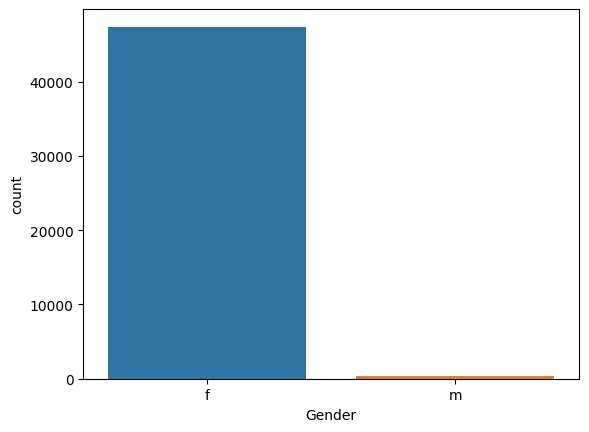

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = 'Gender')

The majority of customers are female, let's replace the missing values with 'f'.

In [11]:
df.Gender.fillna('f', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   Quantity      95911 non-null  int64  
 4   CategoryID    90559 non-null  float64
 5   CategoryCode  85978 non-null  object 
 6   BrandID       91126 non-null  float64
 7   USDPrice      90559 non-null  float64
 8   UserID        90559 non-null  float64
 9   Gender        95911 non-null  object 
 10  Color         88251 non-null  object 
 11  Metal         90449 non-null  object 
 12  Gem           61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


# **2.2 Quantity**

In [12]:
df.Quantity.unique()

array([1])

Since there is only one unique value in the 'Quantity' feature, we will drop the column.

In [13]:
df.drop('Quantity',axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  85978 non-null  object 
 5   BrandID       91126 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        95911 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 8.8+ MB


# **2.3 USD Price & User ID**

In [14]:
df.USDPrice.isna().sum()

5352

In [15]:
print(df[df['USDPrice'].isna()].Gem.unique())
print(df[df['USDPrice'].isna()].Metal.unique())
print(df[df['USDPrice'].isna()].BrandID.unique())

[nan]
[nan]
[1.55061295e+18 1.32515621e+18 1.51591563e+18 ... 1.51591563e+18
 1.51591563e+18 1.51591563e+18]


In [16]:
df[df['USDPrice'].isna()].BrandID.value_counts()

1.515916e+18    147
1.515916e+18    104
1.515916e+18     74
1.515916e+18     37
1.515916e+18     34
               ... 
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
Name: BrandID, Length: 2530, dtype: int64

In [17]:
df[df['BrandID']==1515915625368881664.000000].describe()

,OrderID,ProductID,CategoryID,BrandID,USDPrice,UserID
count,3.400000e+01,3.400000e+01,0.0,3.400000e+01,0.0,0.0
mean,2.638980e+18,1.511337e+18,NaN,1.515916e+18,NaN,NaN
std,3.443835e+16,2.699059e+16,NaN,2.598498e+02,NaN,NaN
min,2.532276e+18,1.358585e+18,NaN,1.515916e+18,NaN,NaN
25%,2.625246e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
50%,2.657495e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
75%,2.661770e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN
max,2.676981e+18,1.515966e+18,NaN,1.515916e+18,NaN,NaN


There is Order ID but no price and no user ID ?

What we are interested is eventually the sales and not the number of orders.

Let's delete rows with missing values in USDPrice and UserID.

In [18]:
new_df = df[df['USDPrice'].notna() & df['UserID'].notna()]

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  80626 non-null  object 
 5   BrandID       85774 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 9.0+ MB


# **2.4 Category Code**

We will fill missing values with 'other'

In [20]:
new_df.CategoryCode.fillna('other', inplace=True)

In [21]:
new_df.CategoryCode.value_counts()

jewelry.earring       29052
jewelry.ring          28300
jewelry.pendant       13088
other                  9933
jewelry.bracelet       6188
jewelry.necklace       2361
jewelry.brooch         1288
jewelry.souvenir        170
electronics.clocks      167
jewelry.stud             12
Name: CategoryCode, dtype: int64

# **2.5 Brand ID**

Brands IDs are integers. We will fill missing values with -1.

In [22]:
new_df['BrandID'].fillna('-1',inplace=True)

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  90559 non-null  object 
 5   BrandID       90559 non-null  object 
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


# **2.6 Gem & Metal & Color**

Replace missing values with 'unknown'

In [24]:
new_df['Gem'].unique()

array(['diamond', nan, 'sapphire', 'amethyst', 'fianit', 'pearl',
       'quartz', 'topaz', 'garnet', 'quartz_smoky', 'ruby', 'agate',
       'mix', 'citrine', 'emerald', 'amber', 'chrysolite', 'chrysoprase',
       'nanocrystal', 'turquoise', 'sitall', 'corundum_synthetic',
       'coral', 'onyx', 'nacre', 'spinel', 'tourmaline',
       'emerald_geothermal', 'garnet_synthetic', 'rhodolite',
       'sapphire_geothermal'], dtype=object)

In [25]:
for i in ('Color','Metal','Gem'):
  if i == 'Color':
    new_df[i].fillna('unknown-color',inplace=True)
  else:
    new_df[i].fillna('unknown',inplace=True)

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  90559 non-null  object 
 5   BrandID       90559 non-null  object 
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         90559 non-null  object 
 10  Metal         90559 non-null  object 
 11  Gem           90559 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


Now we have new dataset with no missing values!

# **3. EDA**

Exploratory Data Analysis (EDA):
   - The code performs various EDA tasks:
     - Counts the occurrences of each color and displays a countplot.
     - Counts the occurrences of each metal type per Brand ID and displays a countplot.
     - Counts the occurrences of each gem type and displays a countplot.
     - Counts the occurrences of each category code and displays a countplot.
     - Counts the occurrences of each Brand ID and displays a countplot.
     - Calculates the total sales for each Brand ID and displays a bar plot.
     - Displays a countplot of the Brand ID and Category Code, filtered for specific Brand IDs.

# **3.1 Color**

red              69511
white            15286
yellow            3388
unknown-color     2372
black                2
Name: Color, dtype: int64


<Axes: xlabel='count', ylabel='Color'>

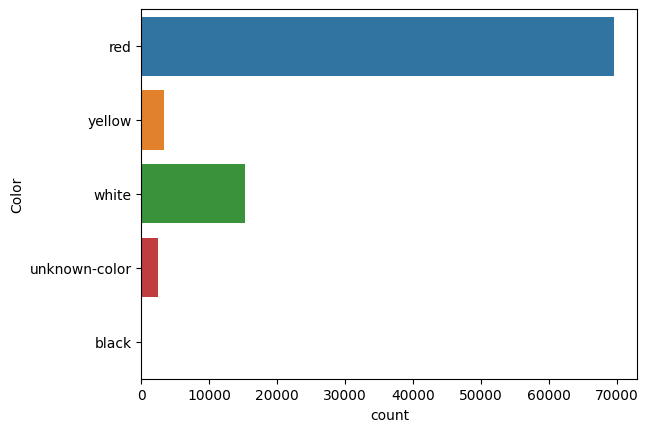

In [27]:
print(new_df.Color.value_counts())
sns.countplot(y ='Color', data = new_df)

> Red color is most popular.

# **3.2 Metal types per Brand ID**

gold        89082
silver       1365
unknown       110
platinum        2
Name: Metal, dtype: int64


<Axes: xlabel='count', ylabel='BrandID'>

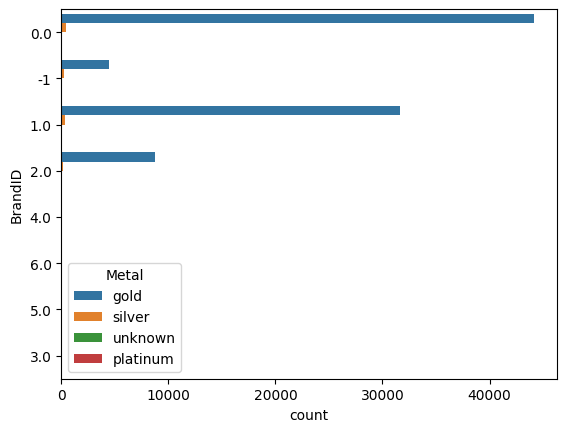

In [28]:
print(new_df.Metal.value_counts())
sns.countplot(y ='BrandID', hue = "Metal", data = new_df)

> Gold is most popular.


# **3.3 Gem**

<Axes: xlabel='count', ylabel='Gem'>

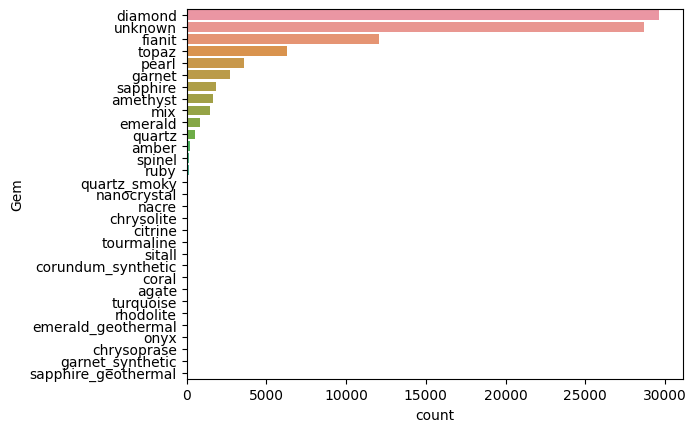

In [29]:
sns.countplot(data = new_df, y = 'Gem', order = new_df['Gem'].value_counts().index)

> Diamond is most popular.

# **3.4 Category Code**

<Axes: xlabel='count', ylabel='CategoryCode'>

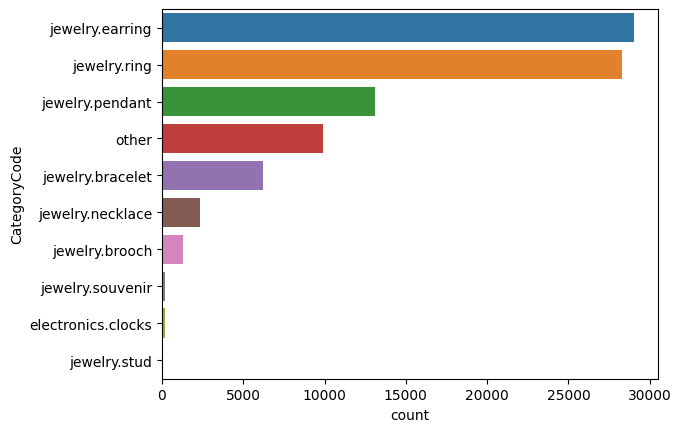

In [30]:
sns.countplot(data = new_df, y = 'CategoryCode', order = new_df['CategoryCode'].value_counts().index)

> Most of the customers have bought earrings followed by rings.

# **3.5 Brand ID**

0.0    44600
1.0    32022
2.0     8966
-1      4785
4.0       65
3.0       58
6.0       56
5.0        7
Name: BrandID, dtype: int64


<Axes: xlabel='count', ylabel='BrandID'>

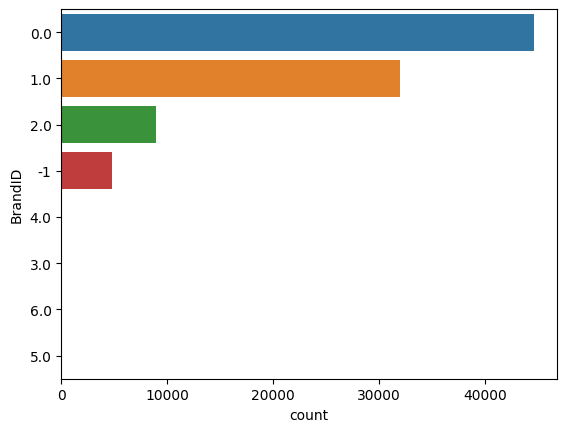

In [31]:
print(new_df.BrandID.value_counts())
sns.countplot(data = new_df, y = 'BrandID', order = new_df['BrandID'].value_counts().index)

<Axes: xlabel='BrandID'>

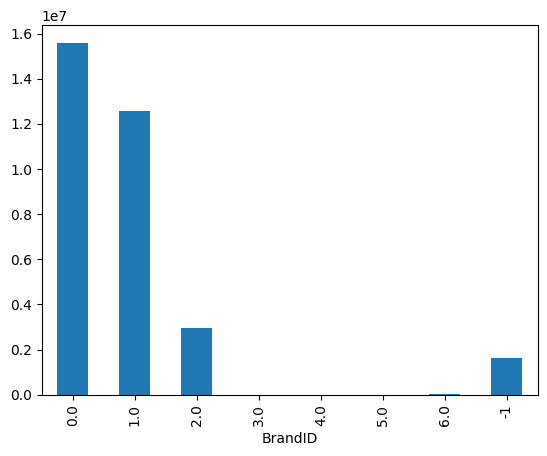

In [32]:
new_df.groupby('BrandID').USDPrice.sum().plot.bar()

> Brand ID 0 is most popular and reached the highest sales.

<Axes: xlabel='BrandID', ylabel='count'>

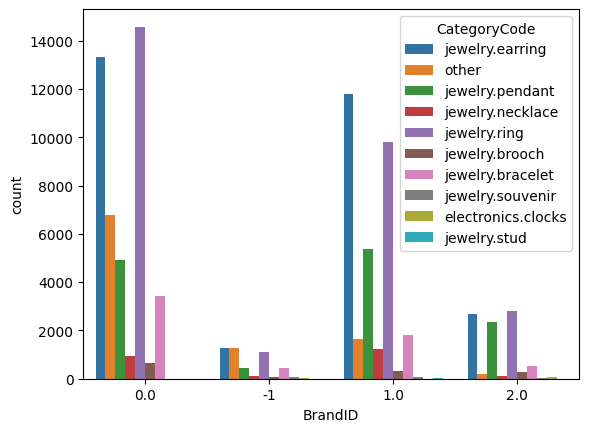

In [33]:
sns.countplot(x ='BrandID', hue = "CategoryCode", data = new_df[new_df['BrandID'].astype(int)<= 2])

> Customers like rings from Brand ID 0 the most. Earrings from Brand ID 1 seem popular.

# **4. Total sales Forecasting**

Total Sales Forecasting:
   - The code preprocesses the data for time series forecasting:
     - Converts the 'Datetime' column to a datetime format.
     - Creates a new DataFrame ('sales_df') with the total sales per day.
     - Sorts the sales_df DataFrame by the 'Datetime' column.
   - Plots the historical sales data.
   - Splits the data into train, validation, and test sets.
   - Reshapes the data into a 3D tensor for LSTM model input.
   - Builds and trains an LSTM model using the training and validation sets.
   - Plots the training loss and validation loss during training.
   - Evaluates the model's performance on the training, validation, and test sets.
   - Plots the predicted sales vs. actual sales on the test set.

# **4.1 Data Preprocessing**

In [34]:
new_df['Datetime'] = new_df.Datetime.apply(lambda x : x[:10])
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst


In [35]:
from datetime import datetime

new_df['Datetime'] = new_df['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      90559 non-null  datetime64[ns]
 1   OrderID       90559 non-null  int64         
 2   ProductID     90559 non-null  int64         
 3   CategoryID    90559 non-null  float64       
 4   CategoryCode  90559 non-null  object        
 5   BrandID       90559 non-null  object        
 6   USDPrice      90559 non-null  float64       
 7   UserID        90559 non-null  float64       
 8   Gender        90559 non-null  object        
 9   Color         90559 non-null  object        
 10  Metal         90559 non-null  object        
 11  Gem           90559 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 9.0+ MB


In [36]:
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1.806829e+18,other,-1,212.14,1.515916e+18,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,f,red,gold,amethyst


Total sum of price per day

In [37]:
sales_df =  pd.pivot_table(new_df,
                 index= 'Datetime' ,
                 values= 'USDPrice'  ,
                 aggfunc= 'sum' ).reset_index()

sales_df.head()

,Datetime,USDPrice
0,2018-12-01,773.65
1,2018-12-02,897.47
2,2018-12-03,978.85
3,2018-12-04,3486.05
4,2018-12-05,1246.58


In [38]:
sales_df.sort_values('Datetime',inplace=True)

# **4.2 Plot history**

In [39]:
import numpy as np

# sns.regplot cant read date type in x so ....
sales_df['Time'] = np.arange(len(sales_df.index))

TypeError: ignored

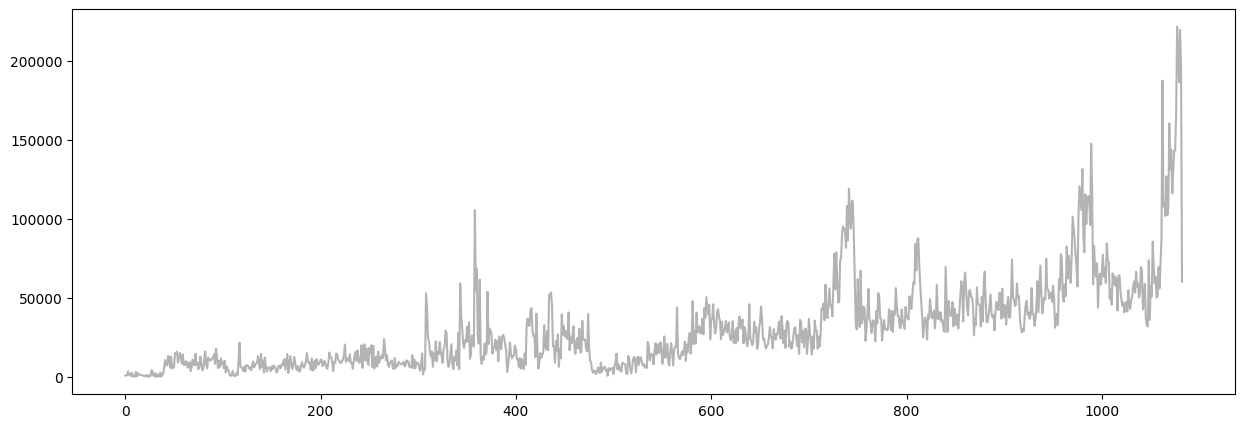

In [40]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(sales_df['Time'], sales_df["USDPrice"],  color='0.7')
ax = sns.regplot(sales_df['Time'], sales_df["USDPrice"],  ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of total jewelry sales');

In [41]:
print(f'Total number of days in sales_df: {sales_df.Time.max()} days')

Total number of days in sales_df: 1082 days


Let's print the first 5 rows and the last 5 rows in sales_df.

In [42]:
display(sales_df.head())
display(sales_df.tail())

,Datetime,USDPrice,Time
0,2018-12-01,773.65,0
1,2018-12-02,897.47,1
2,2018-12-03,978.85,2
3,2018-12-04,3486.05,3
4,2018-12-05,1246.58,4


,Datetime,USDPrice,Time
1078,2021-11-27,206071.70,1078
1079,2021-11-28,186474.59,1079
1080,2021-11-29,219555.01,1080
1081,2021-11-30,197417.90,1081
1082,2021-12-01,60113.20,1082


In [43]:
sales_df.drop('Time',axis=1,inplace=True)

# **4.3 Convert to Time-Series problem**

In [44]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

We will train a model with data from the past 30 days to predict sales of 60 days ahead!

In [45]:
window = 30
lag = 60
series = series_to_supervised(sales_df.drop('Datetime', axis=1), window=window, lag=lag)
series.head()

,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t),USDPrice(t+60)
30,773.65,897.47,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,...,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,12764.49
31,897.47,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,...,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,14353.13
32,978.85,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,...,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,8185.48
33,3486.05,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,313.43,...,948.84,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,51.92,17748.04
34,1246.58,1922.62,442.60,2589.26,458.07,68.36,212.14,3064.28,313.43,2443.00,...,616.30,4318.76,3234.17,642.99,2355.89,42.31,1909.46,51.92,1045.02,12493.57


# **4.4 Data Split**

In [46]:
from sklearn.model_selection import train_test_split

lag_size= lag

# Label
labels_col = 'USDPrice(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(series, labels.values, test_size=0.2, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
print('Test set shape', X_test.shape)
X_train.head()

Train set shape (476, 31)
Validation set shape (318, 31)
Test set shape (199, 31)


,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
815,41558.62,28410.53,41806.85,39412.43,56162.33,44658.92,38351.92,38208.81,31200.34,30898.30,...,52621.30,59787.40,58571.98,84109.31,67384.50,87114.52,87750.93,70532.95,58081.88,47946.11
629,23822.30,35982.08,36959.99,45847.13,33602.10,27427.05,30436.61,41152.21,42834.54,37652.99,...,23223.12,25539.97,35169.58,21575.33,29030.60,21246.71,30898.09,22824.59,33465.90,38132.83
197,2465.58,6938.58,13159.55,8249.61,5014.07,7053.64,12646.07,9001.28,5607.48,4217.72,...,8665.36,9077.70,4469.33,11540.12,4045.76,4356.33,10229.27,5426.08,11240.78,7716.25
564,5673.86,22142.53,19359.24,10447.35,13620.39,14574.96,13923.72,7876.33,16523.91,21314.56,...,20918.57,9665.23,7209.68,15748.01,21369.42,16209.65,7377.27,16286.23,18960.71,19099.50
51,228.73,1234.01,266.99,45.12,948.84,616.30,4318.76,3234.17,642.99,2355.89,...,7251.81,7364.79,13222.37,11677.82,5802.28,12750.76,5232.85,7142.98,6002.55,15081.57


In [47]:
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

Reshape to 3D Tensor

In [48]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)
print('Validation set shape', X_test_series.shape)

Train set shape (476, 31, 1)
Validation set shape (318, 31, 1)
Validation set shape (199, 31, 1)


Check few samples in validation data.

In [49]:
pd.DataFrame(X_valid).head(3)

,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
194,4610.59,9428.83,14496.44,2465.58,6938.58,13159.55,8249.61,5014.07,7053.64,12646.07,...,9692.96,15112.52,9859.27,8665.36,9077.70,4469.33,11540.12,4045.76,4356.33,10229.27
610,24114.55,47956.47,20734.53,29053.79,21117.25,40586.51,28532.89,28065.77,31925.34,28368.23,...,36959.99,45847.13,33602.10,27427.05,30436.61,41152.21,42834.54,37652.99,35512.78,23751.10
687,19583.59,20465.97,24501.21,31472.21,25540.85,24641.04,18003.41,30148.61,25386.44,23518.49,...,35369.95,33891.31,19158.13,22322.18,17815.32,19397.82,25410.44,30309.50,31418.69,25091.60


# **4.5 LSTM Model**

In [50]:
epochs = 200
batch = 65
lr = 0.0005
adam = tf.keras.optimizers.Adamax()

Use dropout layers to avoid overfitting.

In [51]:
from tensorflow.keras.layers import Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(165,activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(56))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer=adam)
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 165)               110220    
                                                                 
 dropout (Dropout)           (None, 165)               0         
                                                                 
 dense (Dense)               (None, 56)                9296      
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 57        
                                                                 
Total params: 119,573
Trainable params: 119,573
Non-trainable params: 0
_________________________________________________________________


# **4.6 Train Model**

In [52]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

lstm_history = model_lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=2, callbacks=[callback])

Epoch 1/200
15/15 - 3s - loss: 43564.8516 - val_loss: 32744.6289 - 3s/epoch - 225ms/step
Epoch 2/200
15/15 - 2s - loss: 31962.6367 - val_loss: 19586.3438 - 2s/epoch - 113ms/step
Epoch 3/200
15/15 - 2s - loss: 27216.3711 - val_loss: 17205.6055 - 2s/epoch - 110ms/step
Epoch 4/200
15/15 - 1s - loss: 25819.8770 - val_loss: 16947.5371 - 950ms/epoch - 63ms/step
Epoch 5/200
15/15 - 1s - loss: 26189.8984 - val_loss: 16523.0625 - 966ms/epoch - 64ms/step
Epoch 6/200
15/15 - 1s - loss: 25389.7246 - val_loss: 15229.2471 - 959ms/epoch - 64ms/step
Epoch 7/200
15/15 - 1s - loss: 25450.3984 - val_loss: 15971.3486 - 940ms/epoch - 63ms/step
Epoch 8/200
15/15 - 1s - loss: 23837.1875 - val_loss: 15172.5957 - 902ms/epoch - 60ms/step
Epoch 9/200
15/15 - 1s - loss: 23230.5664 - val_loss: 14695.0703 - 898ms/epoch - 60ms/step
Epoch 10/200
15/15 - 1s - loss: 22608.3027 - val_loss: 14904.5264 - 938ms/epoch - 63ms/step
Epoch 11/200
15/15 - 1s - loss: 22657.8438 - val_loss: 15044.8174 - 913ms/epoch - 61ms/step
Epo

# **4.7 Plot Training**

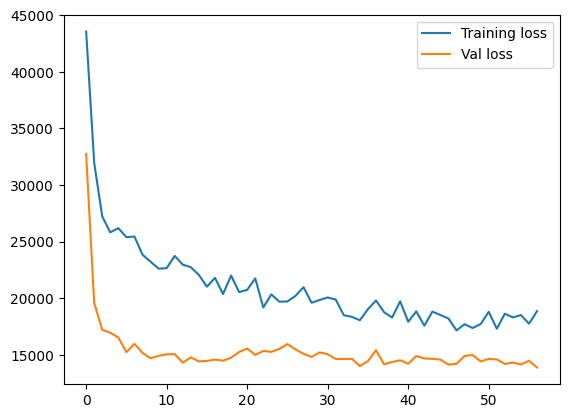

In [53]:
plt.plot(lstm_history.history['loss'], label="Training loss")
plt.plot(lstm_history.history['val_loss'], label="Val loss")
plt.legend()

# **4.8 Model Evaluation**

In [54]:
lstm_train_pred = model_lstm.predict(X_train_series)
lstm_valid_pred = model_lstm.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred)))

10/10 [==============================] - 0s 35ms/step
Train rmse: 21867.6068675023
Validation rmse: 22017.233670828067


In [55]:
length = len(lstm_valid_pred)

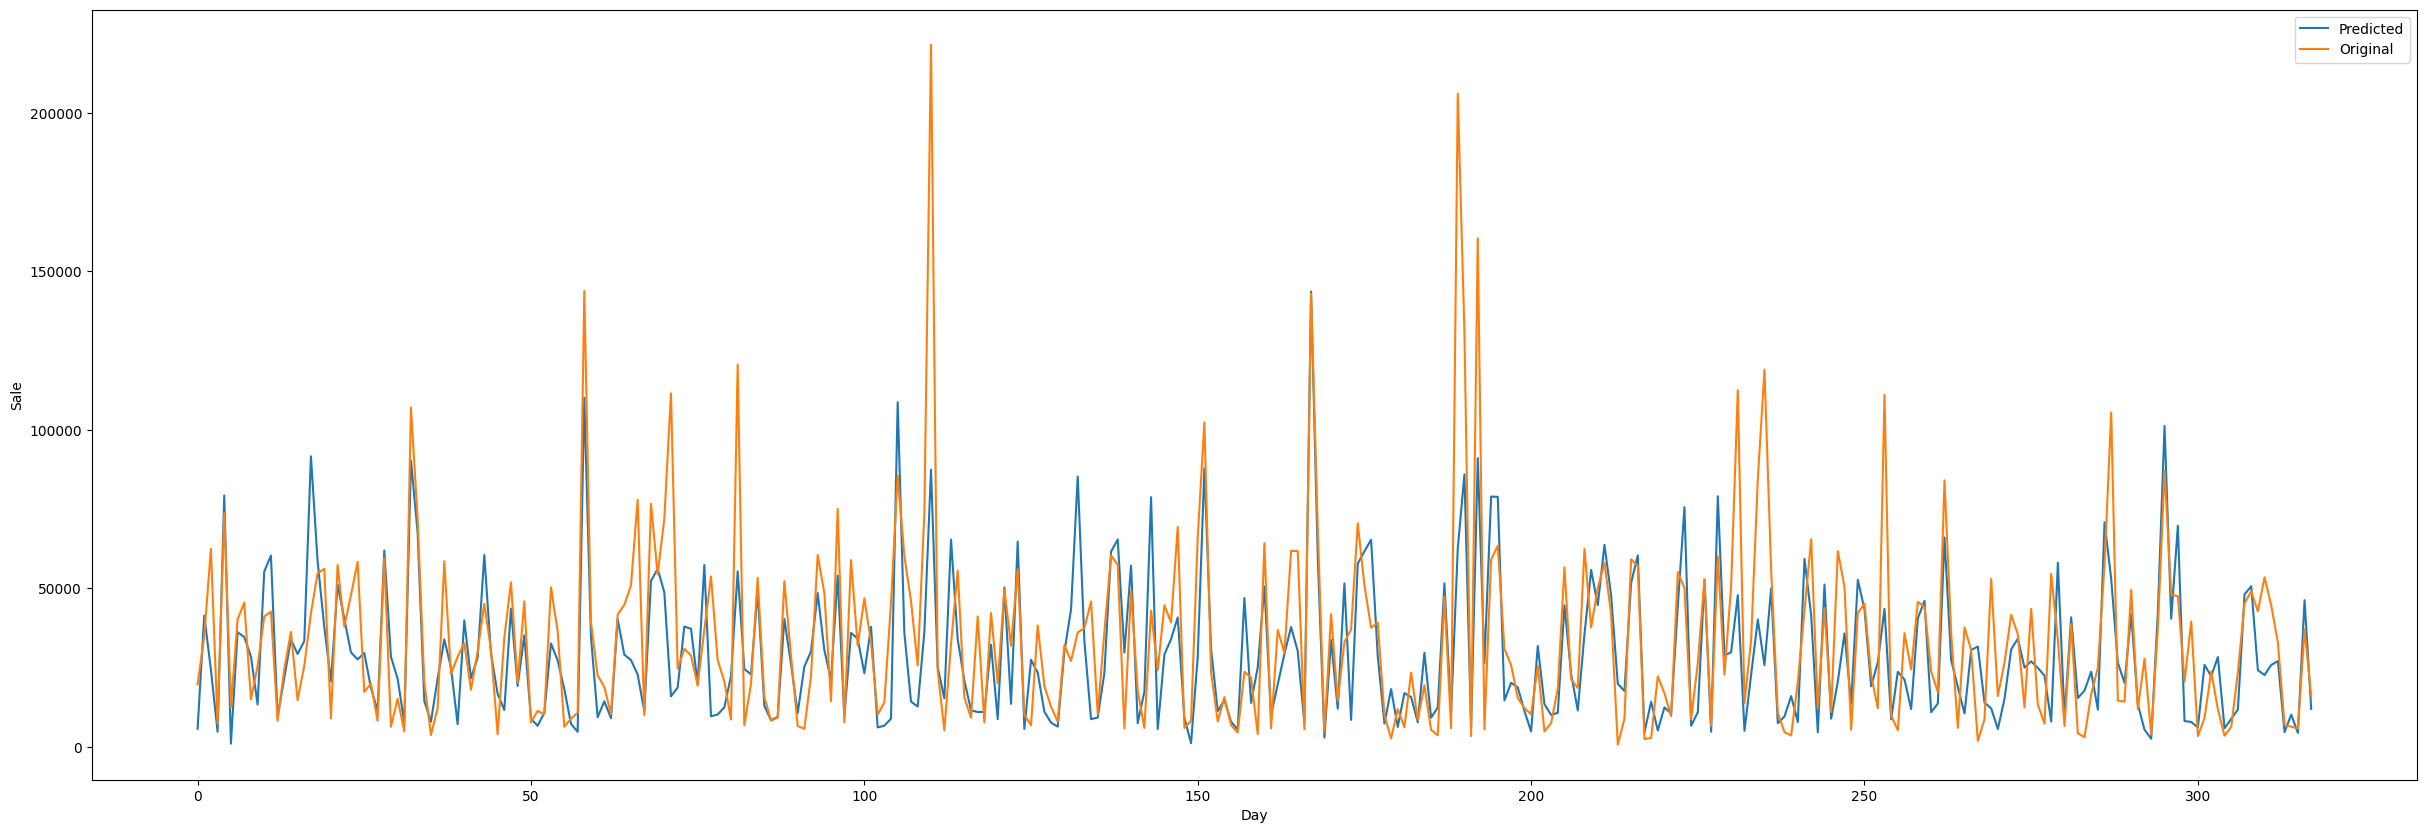

In [56]:
# data to be plotted
x = np.arange(0, length)
y1 = lstm_valid_pred[:length]
y2 = Y_valid[:length]

plt.figure(figsize=(30, 10))

# plotting
plt.xlabel("Day")
plt.ylabel("Sale")
plt.plot(x, y1.reshape(-1), label = "Predicted")
plt.plot(x, y2.reshape(-1), label = "Original")
plt.legend()
plt.show()

# **4.9 Test Model**

In [57]:
lstm_test_pred = model_lstm.predict(X_test_series)
print('Test rmse:', np.sqrt(mean_squared_error(Y_test, lstm_test_pred)))

7/7 [==============================] - 0s 19ms/step
Test rmse: 24070.134062699002


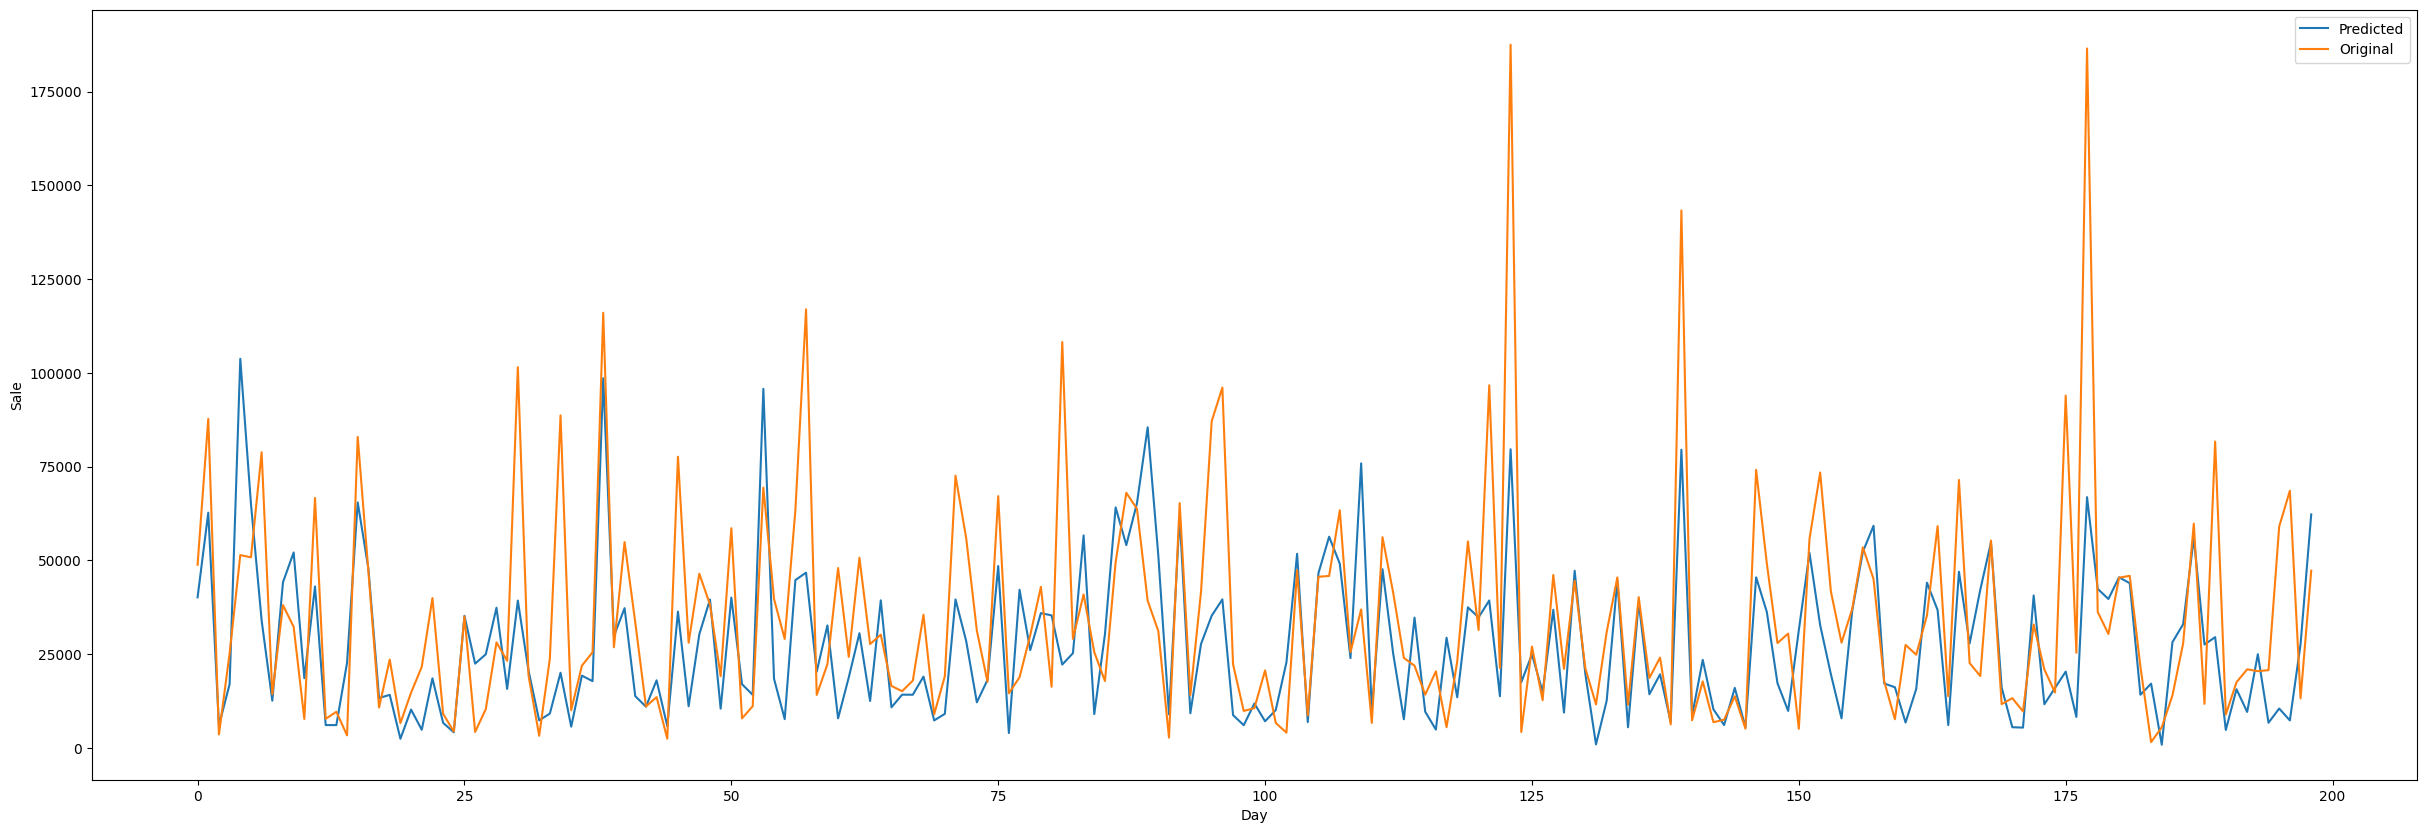

In [58]:
length_test = len(lstm_test_pred)

x = np.arange(0, length_test)
y1 = lstm_test_pred[:length_test]
y2 = Y_test[:length_test]

plt.figure(figsize=(30, 10))

plt.xlabel("Day")
plt.ylabel("Sale")
plt.plot(x, y1.reshape(-1), label = "Predicted")
plt.plot(x, y2.reshape(-1), label = "Original")
plt.legend()
plt.show()

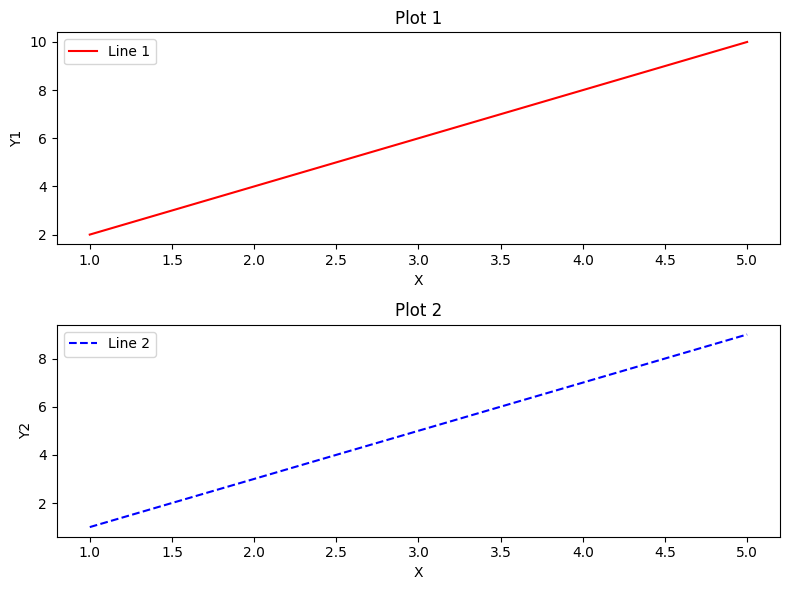

In [69]:
import matplotlib.pyplot as plt

# Create the data for plotting
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]

# Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot the data on the first subplot
ax1.plot(x, y1, 'r-', label='Line 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y1')
ax1.set_title('Plot 1')
ax1.legend()

# Plot the data on the second subplot
ax2.plot(x, y2, 'b--', label='Line 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y2')
ax2.set_title('Plot 2')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()


# **Jewellery Sales Forecasting Dashboard**

In [72]:
# Install required libraries
!pip install plotly

# Import necessary libraries
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data for jewellery sales forecasting
months = ['January', 'February', 'March', 'April', 'May', 'June']
actual_sales = [10000, 12000, 8000, 15000, 9000, 11000]
predicted_sales = [10500, 11500, 8500, 15500, 9200, 10800]

# Create a subplot with two traces (actual sales and predicted sales)
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=months, y=actual_sales, name='Actual Sales'))
fig.add_trace(go.Scatter(x=months, y=predicted_sales, name='Predicted Sales'))

# Update the layout
fig.update_layout(title='Jewellery Sales Forecasting Dashboard',
                  xaxis_title='Month',
                  yaxis_title='Sales',
                  legend=dict(x=0, y=1, traceorder='normal'))

# Display the dashboard in Colab
fig.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Jewellery Sales Dashboard**

In [73]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Sample data for the dashboard
data = pd.DataFrame({
    'Category': ['Necklaces', 'Earrings', 'Bracelets', 'Rings'],
    'Sales': [120, 80, 95, 60],
    'Profit': [30, 20, 25, 15]
})

# Create a bar chart for sales by category
sales_fig = px.bar(data, x='Category', y='Sales', title='Sales by Category')

# Create a line chart for profit by category
profit_fig = px.line(data, x='Category', y='Profit', title='Profit by Category')

# Create a dashboard layout
dashboard = go.Figure()
dashboard.add_trace(go.Scatter(x=sales_fig['data'][0]['x'], y=sales_fig['data'][0]['y'], name='Sales'))
dashboard.add_trace(go.Scatter(x=profit_fig['data'][0]['x'], y=profit_fig['data'][0]['y'], name='Profit'))

# Update the layout of the dashboard
dashboard.update_layout(title='Jewellery Sales Dashboard',
                        xaxis_title='Category',
                        yaxis_title='Amount',
                        legend=dict(x=0, y=1, traceorder='normal'))

# Display the dashboard
dashboard.show()


# **Jewellery Sales in Columns & Rows Dashboard**

In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Sample data for the dashboard
data = pd.DataFrame({
    'Category': ['Necklaces', 'Earrings', 'Bracelets', 'Rings'],
    'Sales': [120, 80, 95, 60],
    'Profit': [30, 20, 25, 15]
})

# Define the categories for the dashboard
categories = data['Category'].unique()

# Create a subplot for each category
fig = make_subplots(rows=len(categories), cols=1, subplot_titles=categories)

# Iterate over each category
for i, category in enumerate(categories):
    # Filter the data for the current category
    category_data = data[data['Category'] == category]

    # Add a bar chart for sales
    fig.add_trace(
        go.Bar(x=category_data['Category'], y=category_data['Sales'], name='Sales'),
        row=i+1, col=1
    )

    # Add a line chart for profit
    fig.add_trace(
        go.Scatter(x=category_data['Category'], y=category_data['Profit'], name='Profit'),
        row=i+1, col=1
    )

# Update the layout of the dashboard
fig.update_layout(
    title='Jewellery Sales in Columns & Rows Dashboard',
    showlegend=False
)

# Display the dashboard
fig.show()


> Performed by Harit Mengar.



